[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Singer/surf_tense_mcmc.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Singer/surf_tens_mcmc.ipynb)

In [3]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [4]:
%env NUMBA_DISABLE_JIT=1

env: NUMBA_DISABLE_JIT=1


In [5]:
from matplotlib import pylab
import numpy as np
from PySDM import Formulae
from PySDM.physics import si, constants as const
from atmos_cloud_sim_uj_utils import show_plot
from PySDM_examples.Singer.aerosol import AerosolBetaCary

In [6]:
from PySDM.physics.surface_tension import compressed_film_ovadnevaite
compressed_film_ovadnevaite.sgm_org = 40.0 * si.mN / si.m
compressed_film_ovadnevaite.delta_min = 0.3 * si.nm

In [7]:
formulae_ovad = Formulae(surface_tension='CompressedFilmOvadnevaite')
label = 'Ovad'

cases = {
    'Beta Caryophyllene': AerosolBetaCary()
}

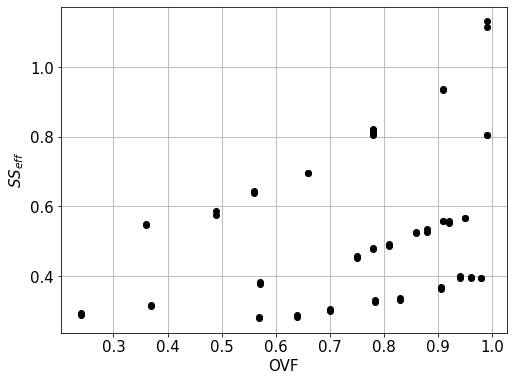

In [21]:
from importlib import reload
import Scrit_mcmc
reload(Scrit_mcmc)
from Scrit_mcmc import param_transform, get_model, MCMC

params = [0.22, -1.2]
#params = [0.2, -1.5]
stepsize = [0.01,0.01]

ds = np.loadtxt("bcary.csv",skiprows=1,delimiter=",")
rd = ds[:,0]*1e-9
ovf = np.minimum(ds[:,1], 0.99)
kappa_eff = ds[:,2]
RHeq = ds[:,3]
SScrit = (RHeq-1)*100.0

datay = SScrit
errory = datay*0.1

T = 300.0
args = [T, rd, ovf]

pylab.figure(figsize=(8,6))
pylab.plot(ovf, SScrit, 'ko')
pylab.xlabel("OVF")
pylab.ylabel("$SS_{eff}$")
pylab.rcParams.update({'font.size':15})
pylab.grid()
pylab.show()

[62.97454713  1.29557913]


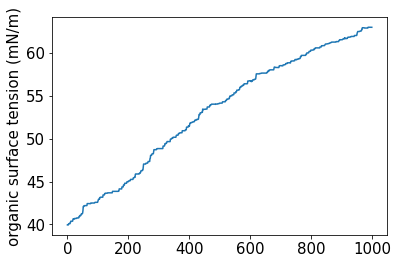

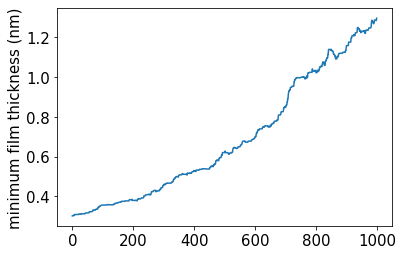

In [19]:
n_steps = 1000
param_chain, accept_chain, chi2_chain = MCMC(params, stepsize, args, datay, errory, n_steps)

# pylab.plot(param_chain[0,:])
# pylab.show()
# pylab.plot(param_chain[1,:])
# pylab.show()

p = param_transform(param_chain)
print(p[:,-1])
pylab.plot(p[0,:])
pylab.ylabel("organic surface tension (mN/m)")
pylab.show()
pylab.plot(p[1,:])
pylab.ylabel("minimum film thickness (nm)")
pylab.show()

### Surface tension

[39.94410493  0.30119421]
[0.19666266 0.23026429 0.2534901  0.29720951 0.38225191 0.38225191
 0.61854581 0.1041944  0.12008486 0.15527758 0.21468525 0.23075845
 0.25034002 0.29553899 0.32088882 0.37340473 0.39706652 0.50607091
 1.1428901  0.10635386 0.11889998 0.1325454  0.15991915 0.18251268
 0.24898136 0.31883974 0.38907626 0.55297275 0.78394892 0.19666266
 0.23026429 0.2534901  0.29720951 0.38225191 0.38225191 0.61854581
 0.1041944  0.12008486 0.15527758 0.21468525 0.23075845 0.25034002
 0.29553899 0.32088882 0.37340473 0.39706652 0.50607091 1.1428901
 0.10635386 0.11889998 0.1325454  0.15991915 0.18251268 0.24898136
 0.31883974 0.38907626 0.55297275 0.78394892]
[62.97454713  1.29557913]
[0.19666266 0.23026429 0.2534901  0.29720951 0.38225191 0.38225191
 0.61854581 0.1041944  0.12008486 0.15527758 0.21468525 0.23075845
 0.25034002 0.29553899 0.32088882 0.37340473 0.39706652 0.50607091
 1.1428901  0.10635386 0.11889998 0.1325454  0.15991915 0.18251268
 0.24898136 0.31883974 0.3890762

/Users/claresinger/anaconda3/envs/pysdm-env/lib/python3.8/site-packages/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  (2 * sgm / const.Rv / T / const.rho_w) / r -
/Users/claresinger/anaconda3/envs/pysdm-env/lib/python3.8/site-packages/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  kp * rd3 / power(r, const.THREE)
/Users/claresinger/anaconda3/envs/pysdm-env/lib/python3.8/site-packages/PySDM/physics/hygroscopicity/kappa_koehler_leading_terms.py:9: RuntimeWarning: invalid value encountered in double_scalars
  1 +


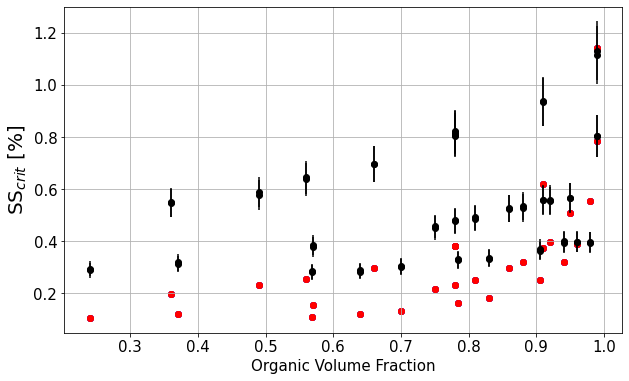

In [20]:
reload(Scrit_mcmc)
from Scrit_mcmc import *

pylab.figure(figsize=(10,6))

# before
p = param_transform(param_chain[:,0])
print(p)

Scrit_before = get_model(p, args)
print(Scrit_before)
pylab.scatter(ovf, Scrit_before, label="before", c="b")

# after
p = param_transform(param_chain[:,-1])
print(p)

Scrit_after = get_model(p, args)
print(Scrit_after)
pylab.scatter(ovf, Scrit_after, label="after", c="r")

# data
pylab.errorbar(ovf, datay, yerr=errory, fmt='ko')

#pylab.colorbar(label="Dry radius (nm)")
pylab.xlabel("Organic Volume Fraction")
pylab.ylabel("SS$_{crit}$ [%]",fontsize=20)
pylab.rcParams.update({"font.size":15})
pylab.grid()
pylab.show()